<a href="https://colab.research.google.com/github/samreed83/Analysis_Projects/blob/main/Drugged_Islander_Memory_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/Islander_data.csv')

In [31]:
df.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


In [32]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
palette =['#94c5c8', '#07766D', '#59313a']

In [34]:
df.columns

Index(['index', 'first_name', 'last_name', 'age', 'Happy_Sad_group', 'Dosage',
       'Drug', 'Mem_Score_Before', 'Mem_Score_After'],
      dtype='object')

<Axes: ylabel='Frequency'>

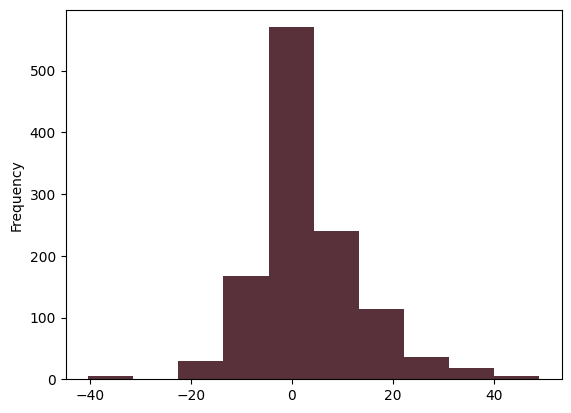

In [35]:
df['Diff']=df['Mem_Score_After']-df['Mem_Score_Before']
df['Diff'].plot(kind='hist', color=palette[2])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1188 non-null   int64  
 1   first_name        1188 non-null   object 
 2   last_name         1188 non-null   object 
 3   age               1188 non-null   int64  
 4   Happy_Sad_group   1188 non-null   object 
 5   Dosage            1188 non-null   int64  
 6   Drug              1188 non-null   object 
 7   Mem_Score_Before  1188 non-null   float64
 8   Mem_Score_After   1188 non-null   float64
 9   Diff              1188 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 92.9+ KB


In [37]:
df.columns

Index(['index', 'first_name', 'last_name', 'age', 'Happy_Sad_group', 'Dosage',
       'Drug', 'Mem_Score_Before', 'Mem_Score_After', 'Diff'],
      dtype='object')

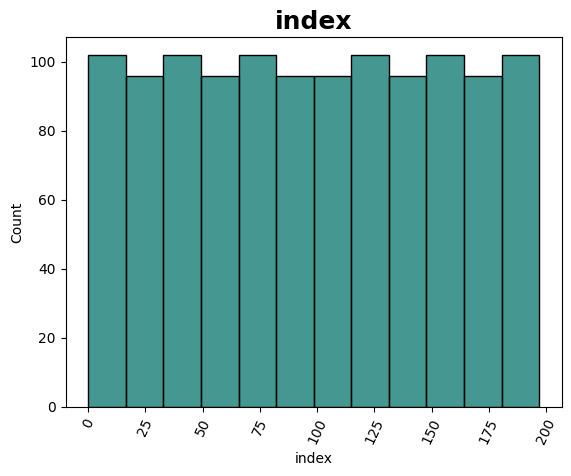

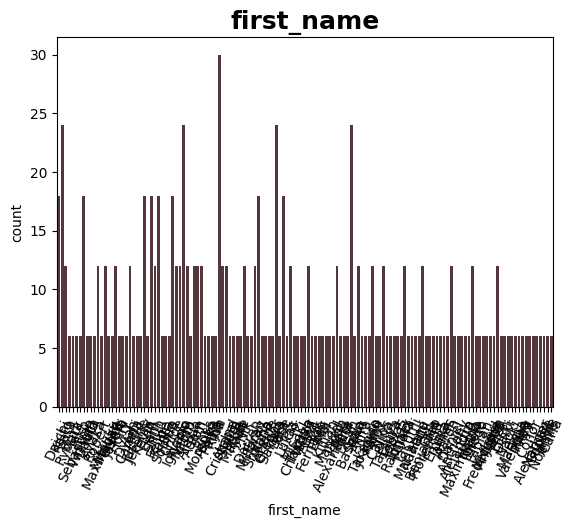

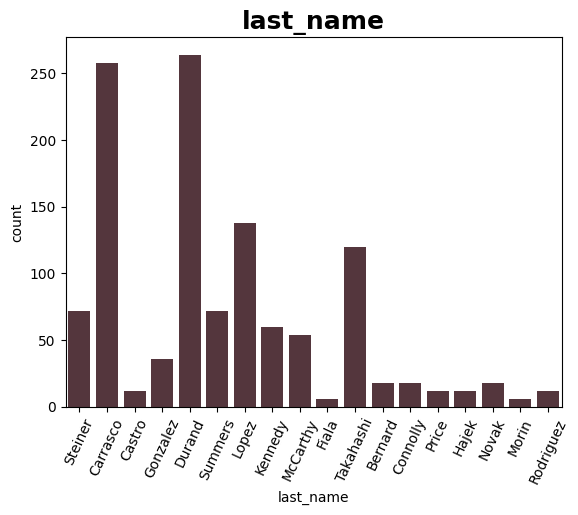

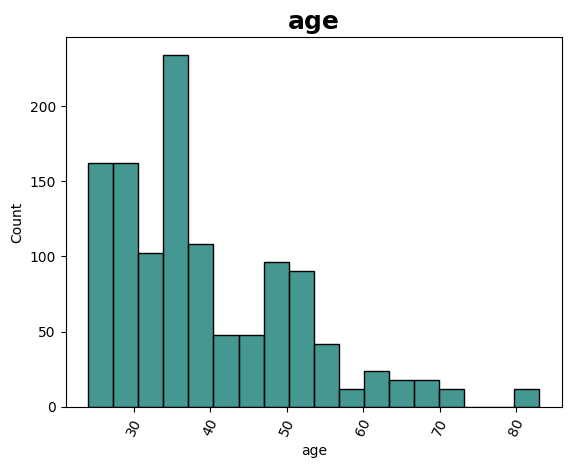

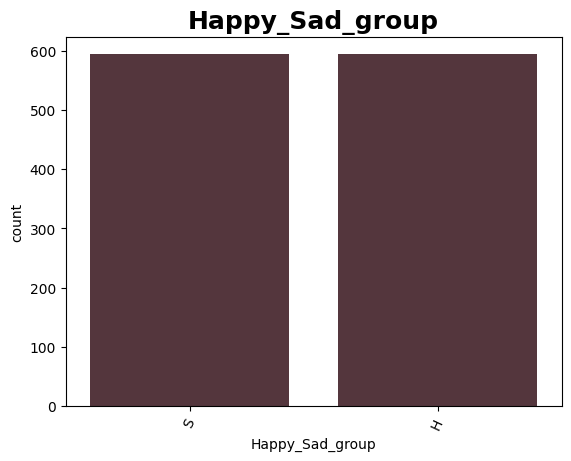

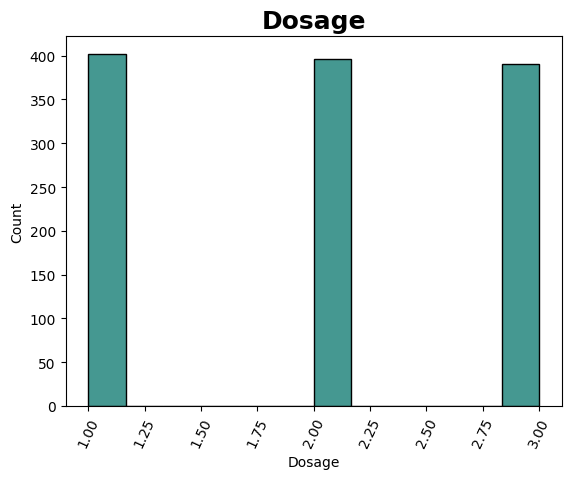

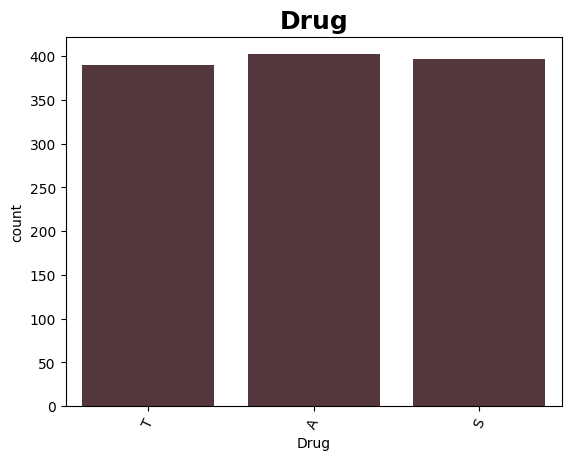

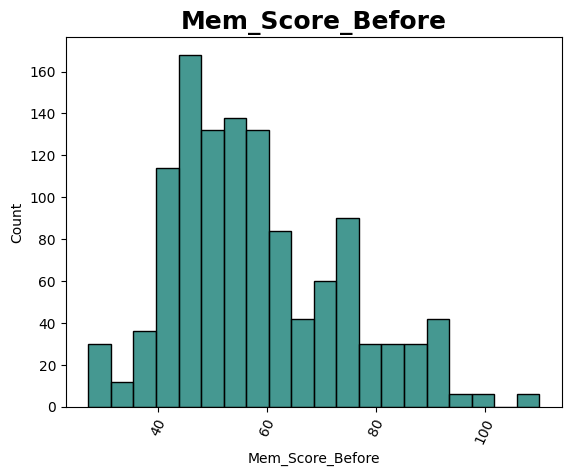

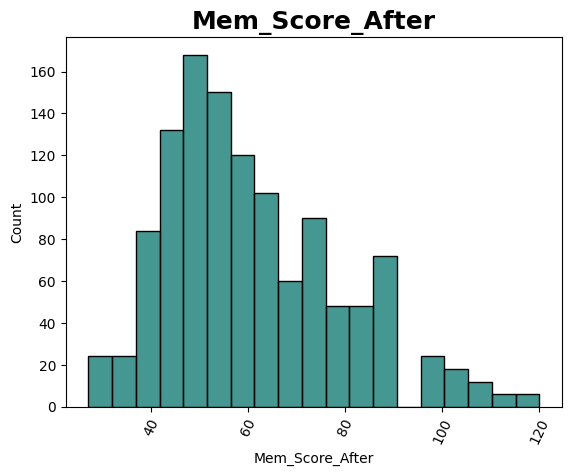

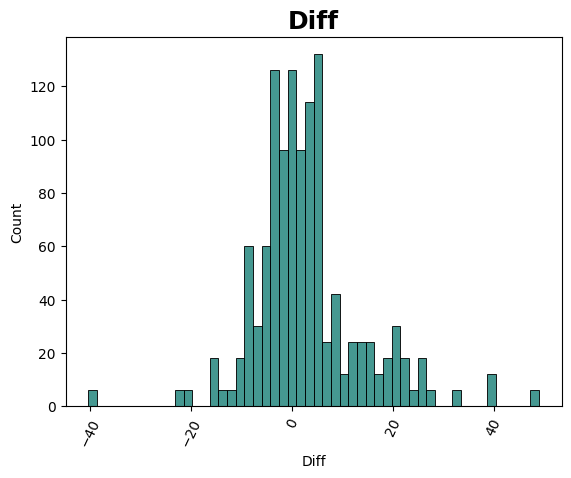

In [38]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot (data=df, x=feat, color=palette[2])
  else:
    sns.histplot (data=df, x=feat, color=palette[1])
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks (rotation=65)
  plt.show()

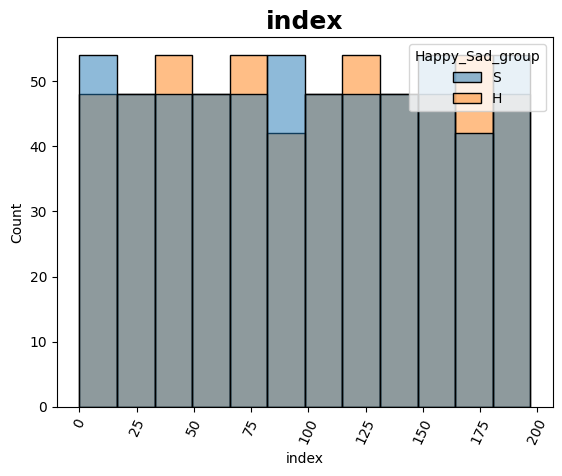

<ipython-input-39-71a7c135e6b8>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette, hue='Happy_Sad_group')


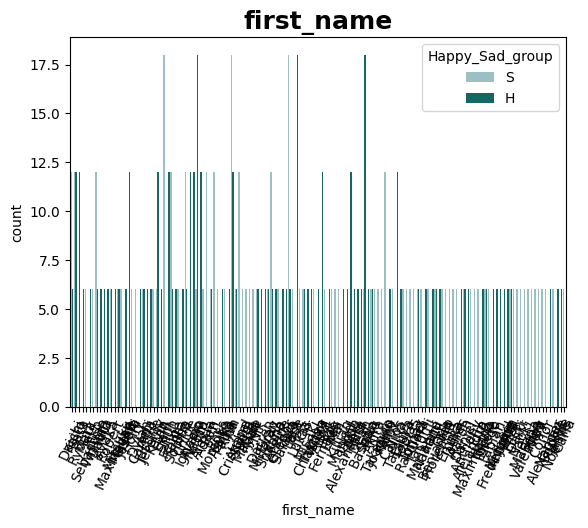

<ipython-input-39-71a7c135e6b8>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette, hue='Happy_Sad_group')


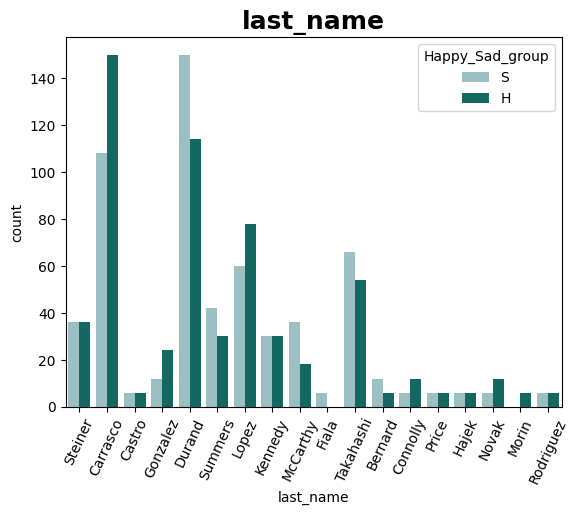

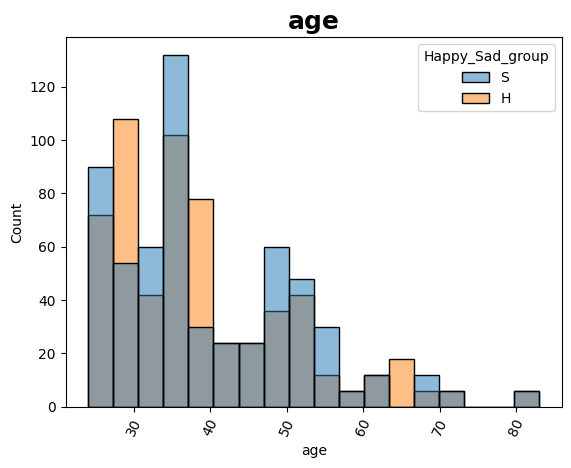

<ipython-input-39-71a7c135e6b8>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette, hue='Happy_Sad_group')


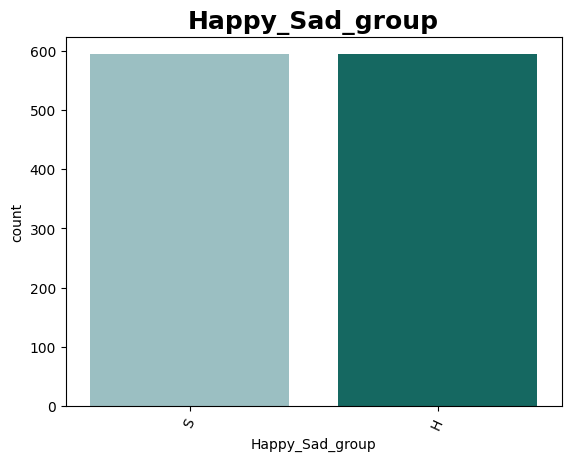

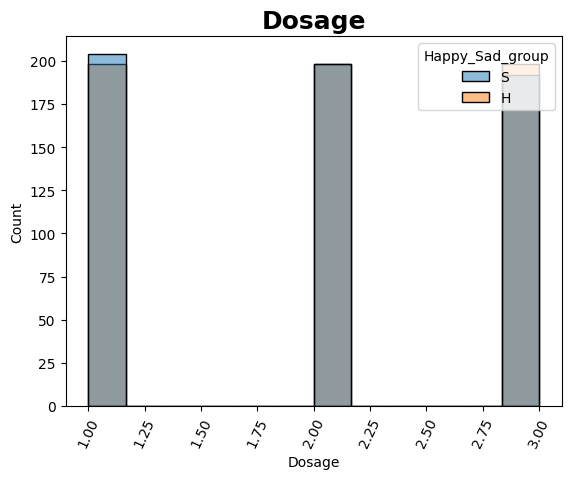

<ipython-input-39-71a7c135e6b8>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette, hue='Happy_Sad_group')


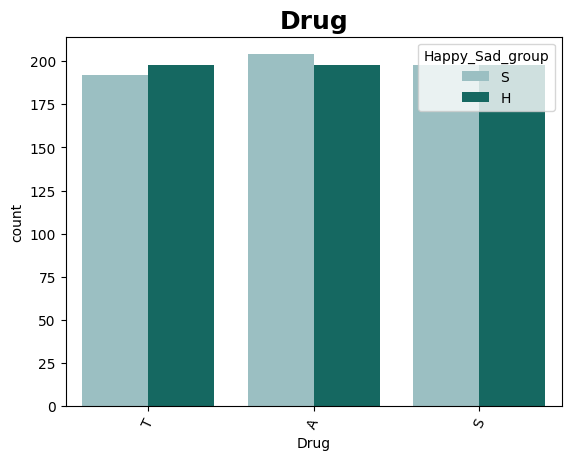

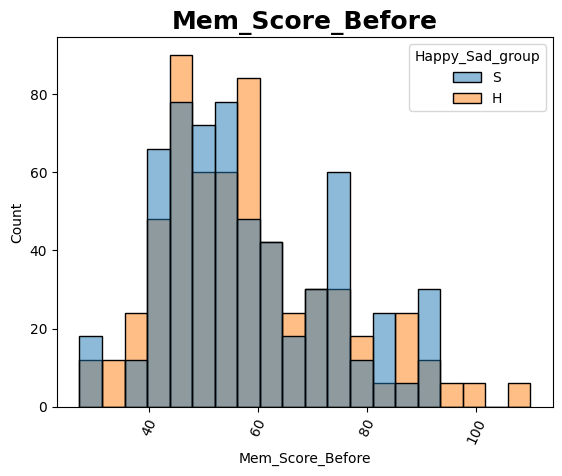

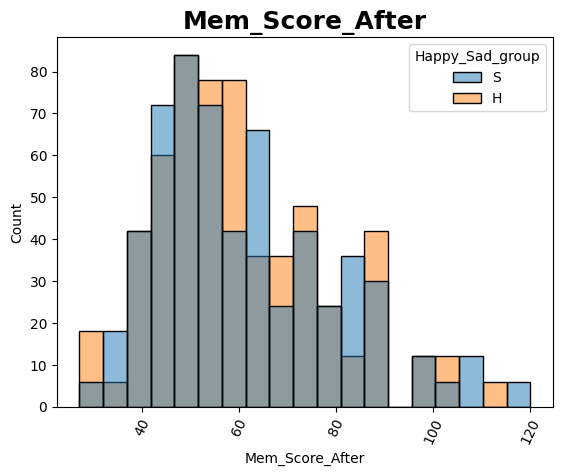

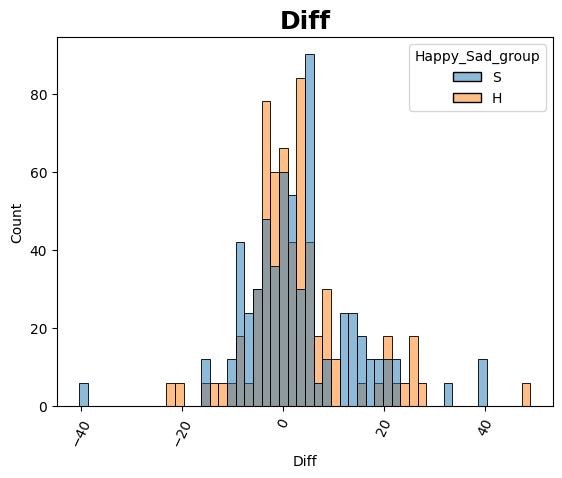

In [39]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat, palette=palette, hue='Happy_Sad_group')
  else:
    sns.histplot(data=df, x=feat,  hue='Happy_Sad_group')
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

In [40]:
df.groupby('Happy_Sad_group').mean(numeric_only=True)

,index,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
Happy_Sad_group,,,,,,
H,98.909091,39.101010,2.000000,57.843434,60.576768,2.733333
S,98.090909,39.959596,1.979798,58.091919,61.267677,3.175758


<Axes: xlabel='Drug'>

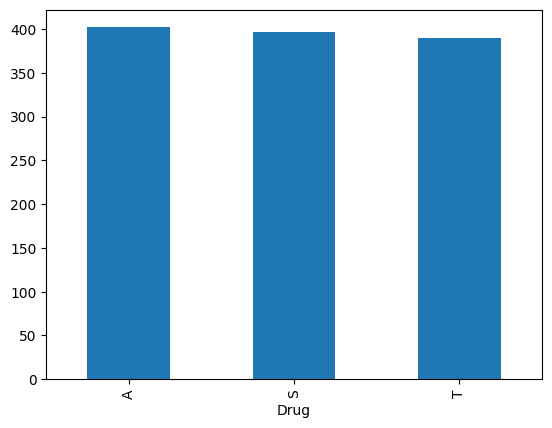

In [41]:
df['Drug'].value_counts().plot (kind='bar')

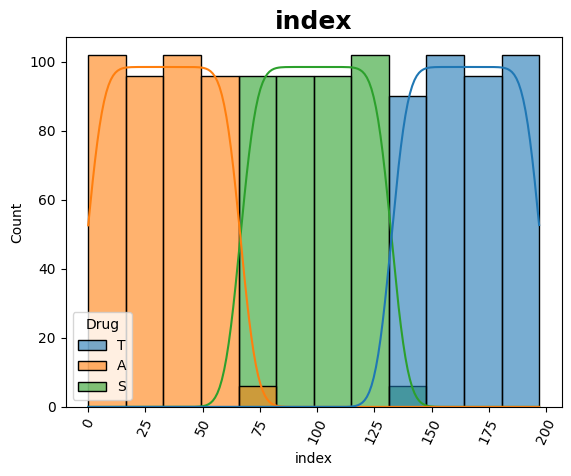

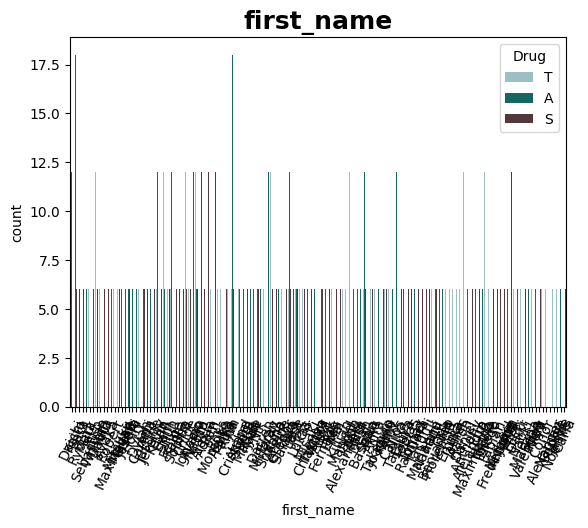

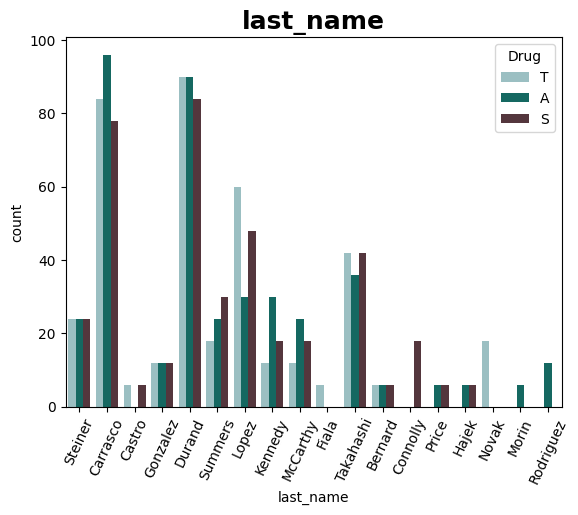

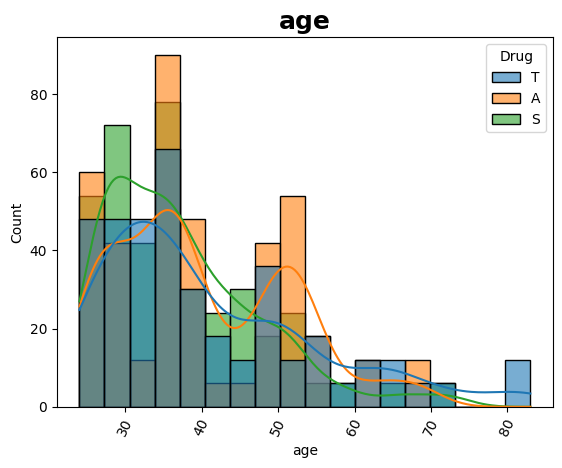

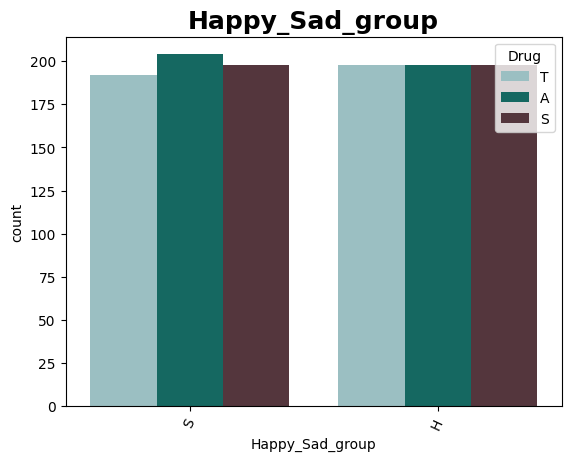

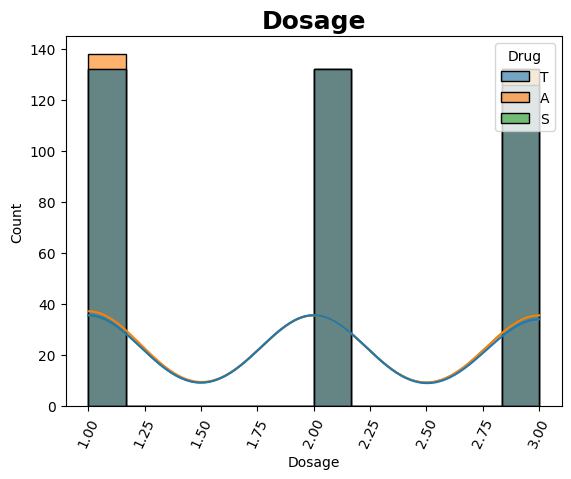

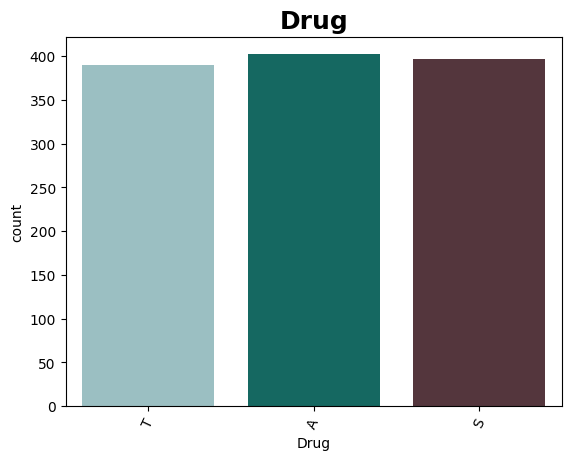

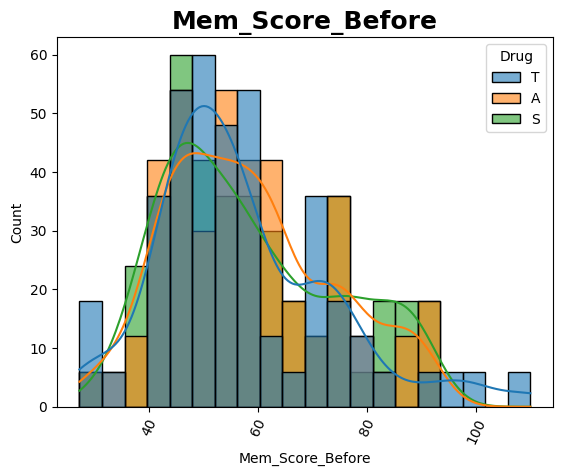

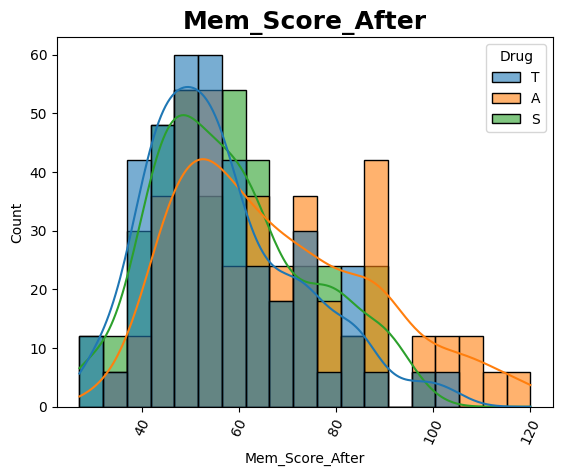

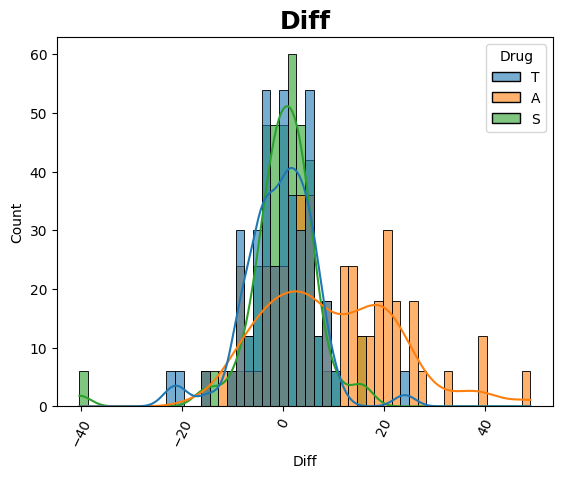

In [42]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat, palette=palette, hue='Drug')
  else:
    sns.histplot(data=df, x=feat,  hue='Drug', kde=True, alpha=.6)
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

<Axes: ylabel='Frequency'>

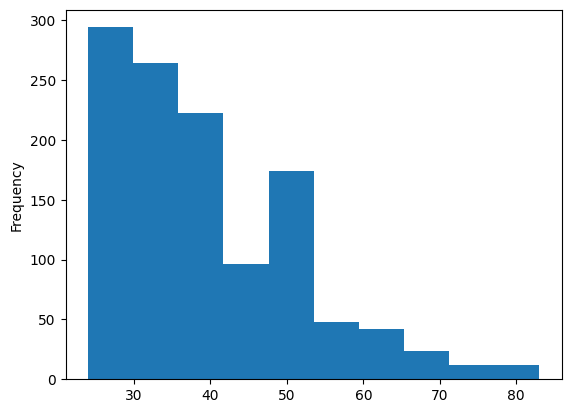

In [43]:
df['age'].plot(kind='hist')

In [44]:
def age_to_cat(x):
  if x > 55:
    value = 'senior'
  elif x < 35:
    value = 'young'
  else:
    value = 'adult'
  return value

In [45]:
df["age_cat"]=df['age'].apply(age_to_cat)
df['age_cat']

,age_cat
0,adult
1,adult
2,adult
3,adult
4,senior
...,...
1183,young
1184,adult
1185,adult
1186,senior


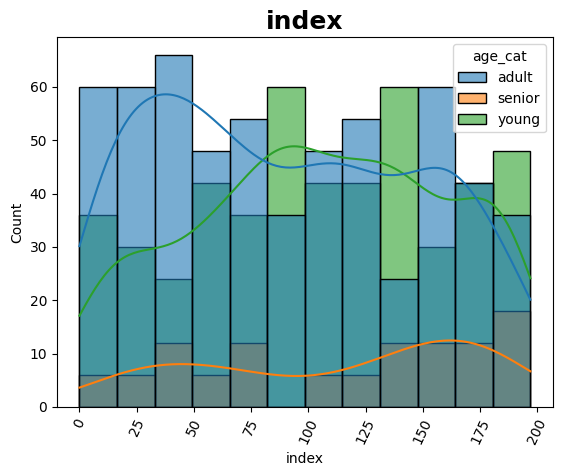

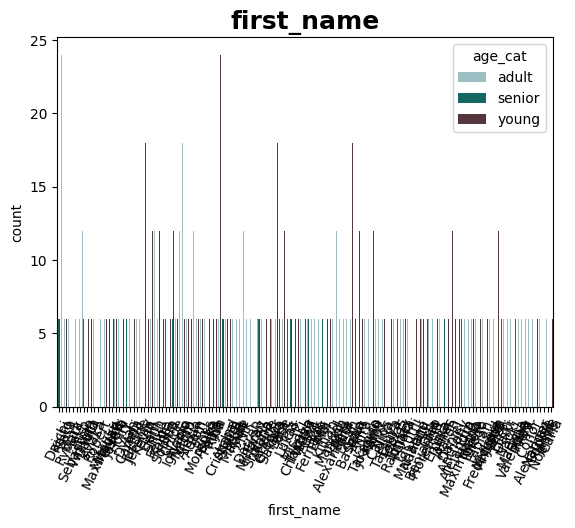

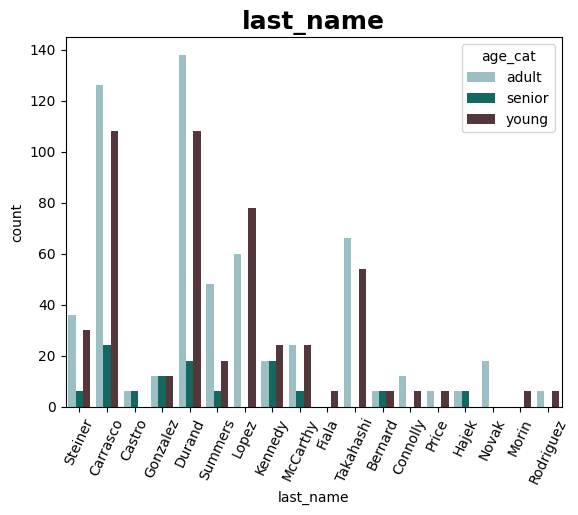

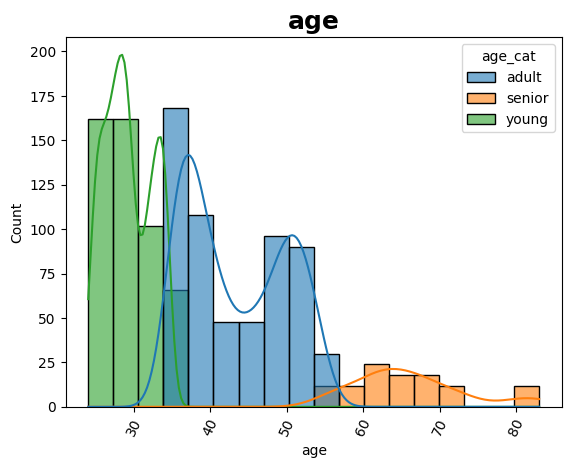

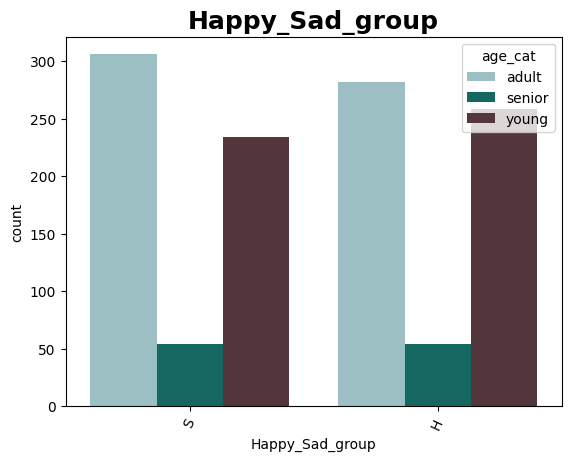

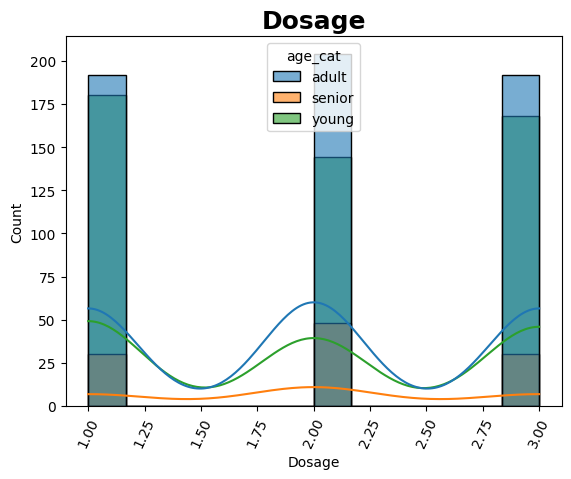

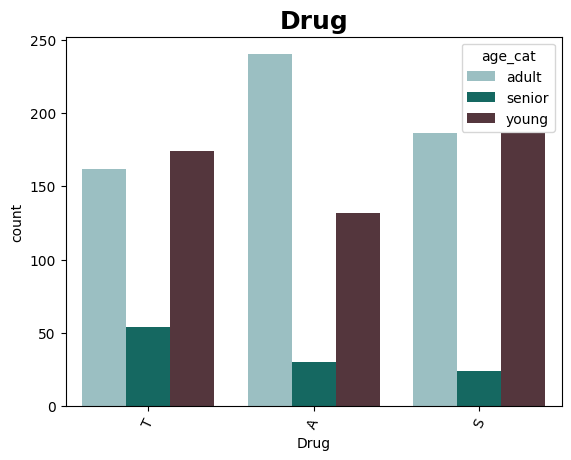

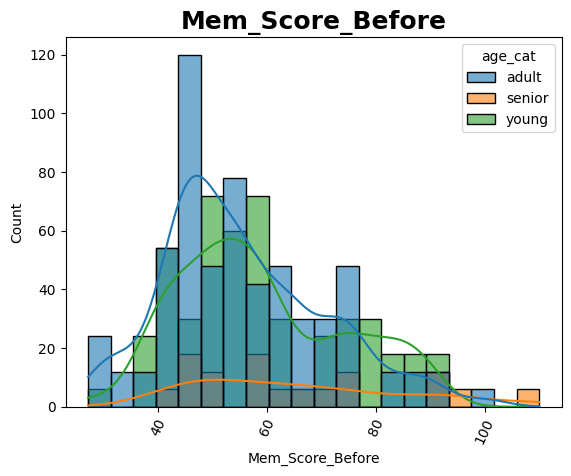

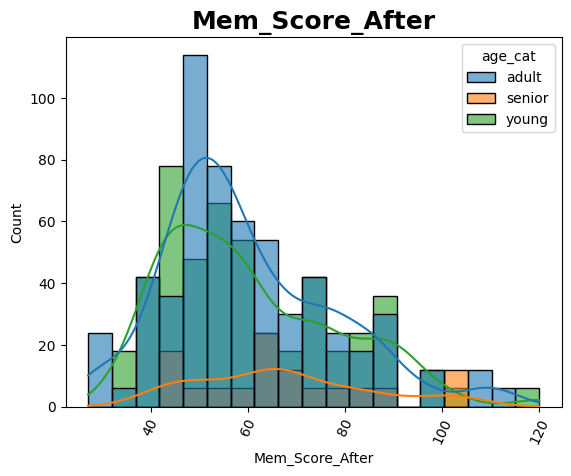

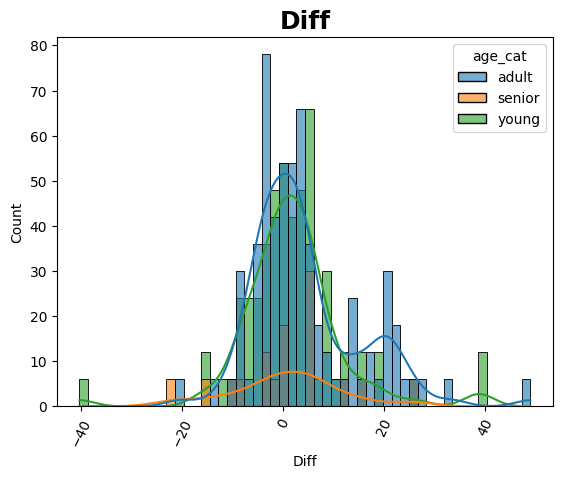

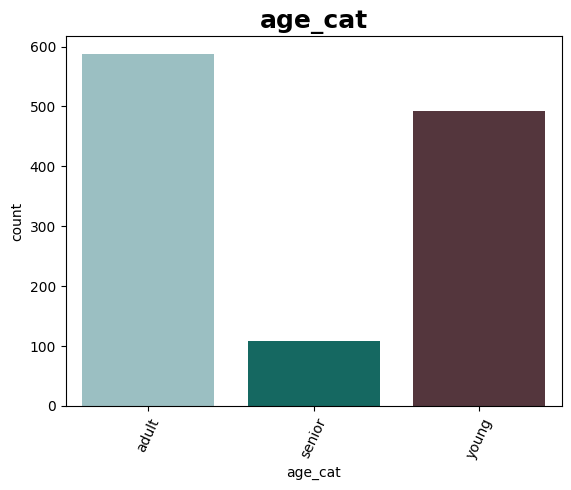

In [46]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat, palette=palette, hue='age_cat')
  else:
    sns.histplot(data=df, x=feat,  hue='age_cat', kde=True, alpha=.6)
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

In [47]:
def hp_grp_to_int(x):
  if x == 'H':
    value = 1
  elif x == 'S':
    value = 0
  return value

In [48]:
df['Happy_Sad_group_int'] = df['Happy_Sad_group'].apply(hp_grp_to_int)
df['Happy_Sad_group_int'].value_counts()

,count
Happy_Sad_group_int,
0,594
1,594


In [49]:
def drg_to_int(x):
  if x == 'A':
    value = 1
  elif x == 'T':
    value = 0
  elif x == 'S':
    value = 0
  return value

In [50]:
df['Drug_int']= df['Drug'].apply(drg_to_int)
df['Drug_int'].value_counts()

,count
Drug_int,
0,786
1,402


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

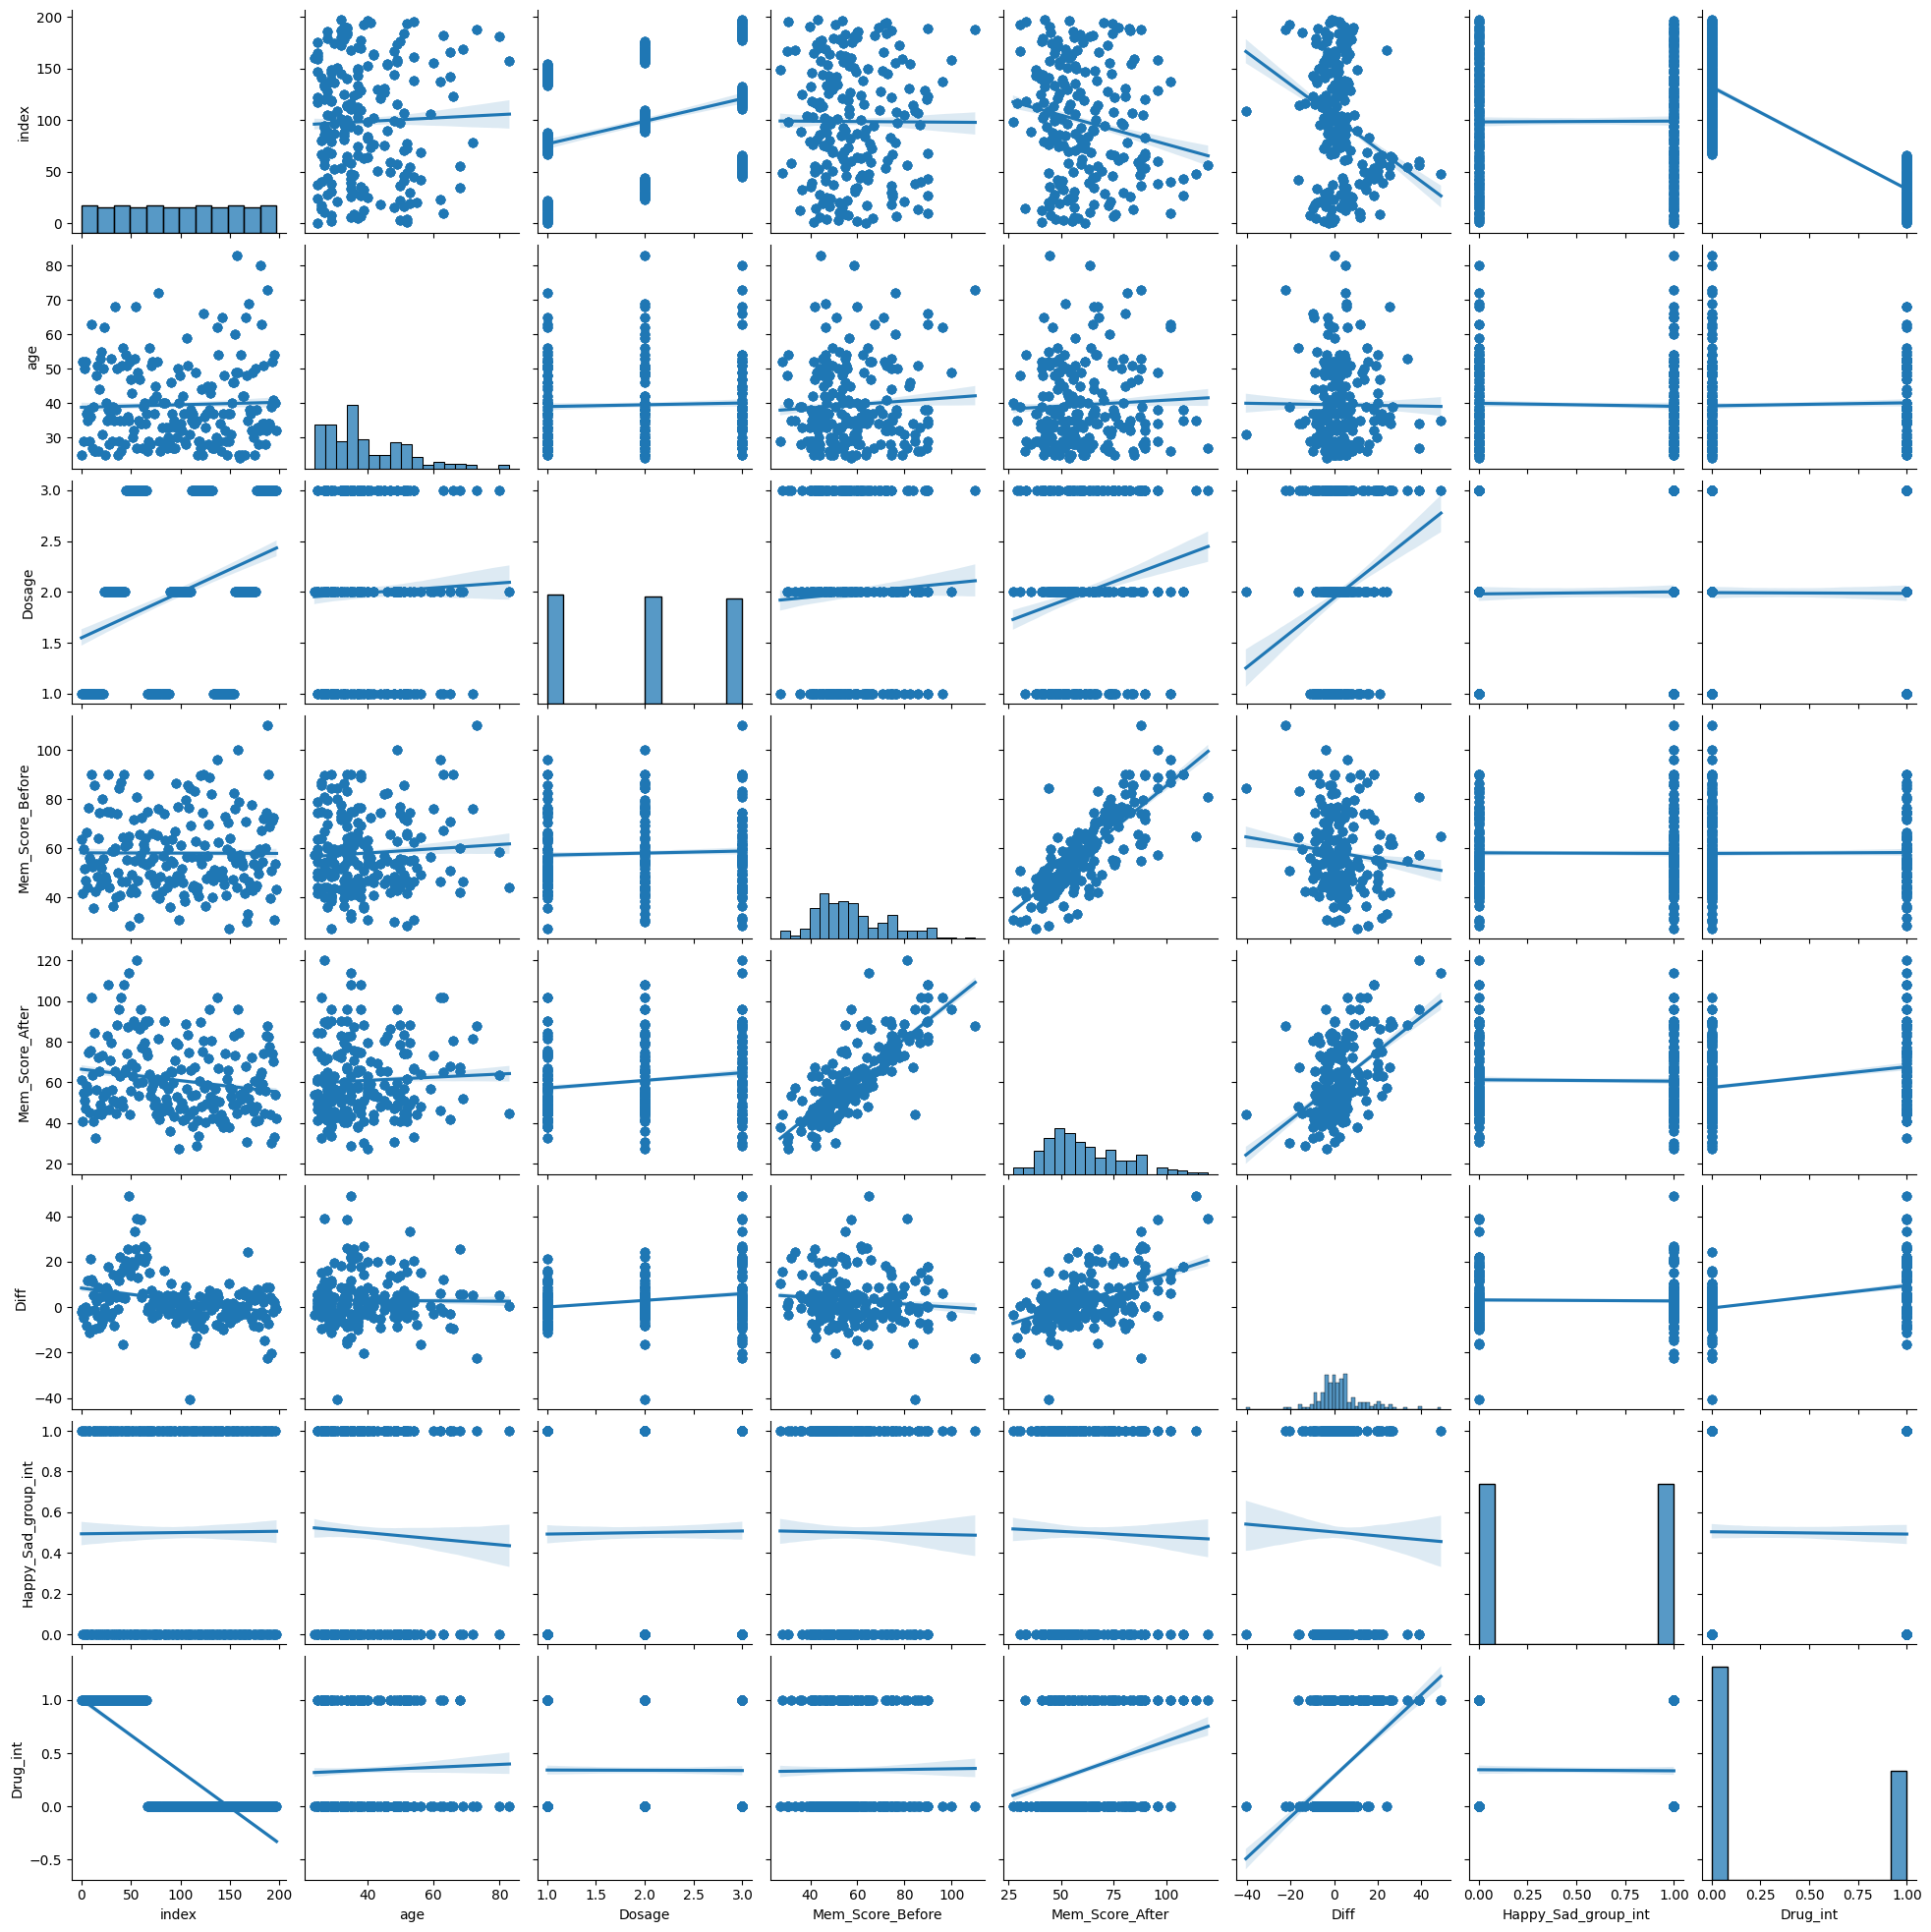

In [51]:
sns.pairplot(df, palette=palette[2], kind='reg')